# Reading and understanding the data

In [266]:
# importing the standard packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [267]:
# Importing the data
mobile = pd.read_csv('/Users/mamta/Downloads/Projects/Mobile Price Prediction/Cellphone.csv')
mobile.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [268]:
# shape of the data

mobile.shape

(161, 14)

In [269]:
# checking for null values and the data types of features 
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [270]:
mobile.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


# EDA 

#### Feature - Price

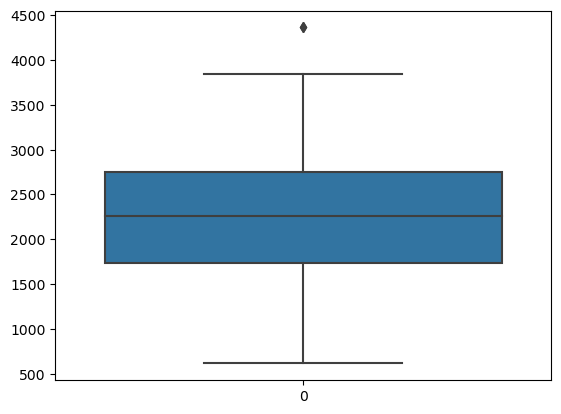

In [271]:
sns.boxplot(mobile['Price'])
plt.show()

We don't see many outliers present in the target variable. 

### Outlier Treatment 

In [272]:
## capping the outliers 

for var in mobile.columns:
    Q1 = mobile[var].quantile(0.05)
    Q3 = mobile[var].quantile(0.95)

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mobile[var] = np.where(mobile[var] > upper_bound, upper_bound, mobile[var])
    mobile[var] = np.where(mobile[var] < lower_bound, lower_bound, mobile[var])

In [273]:
mobile.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,601.186335,168.891925,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1435.468849,83.772801,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,8099.000000,629.500000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


### Univariate Analysis

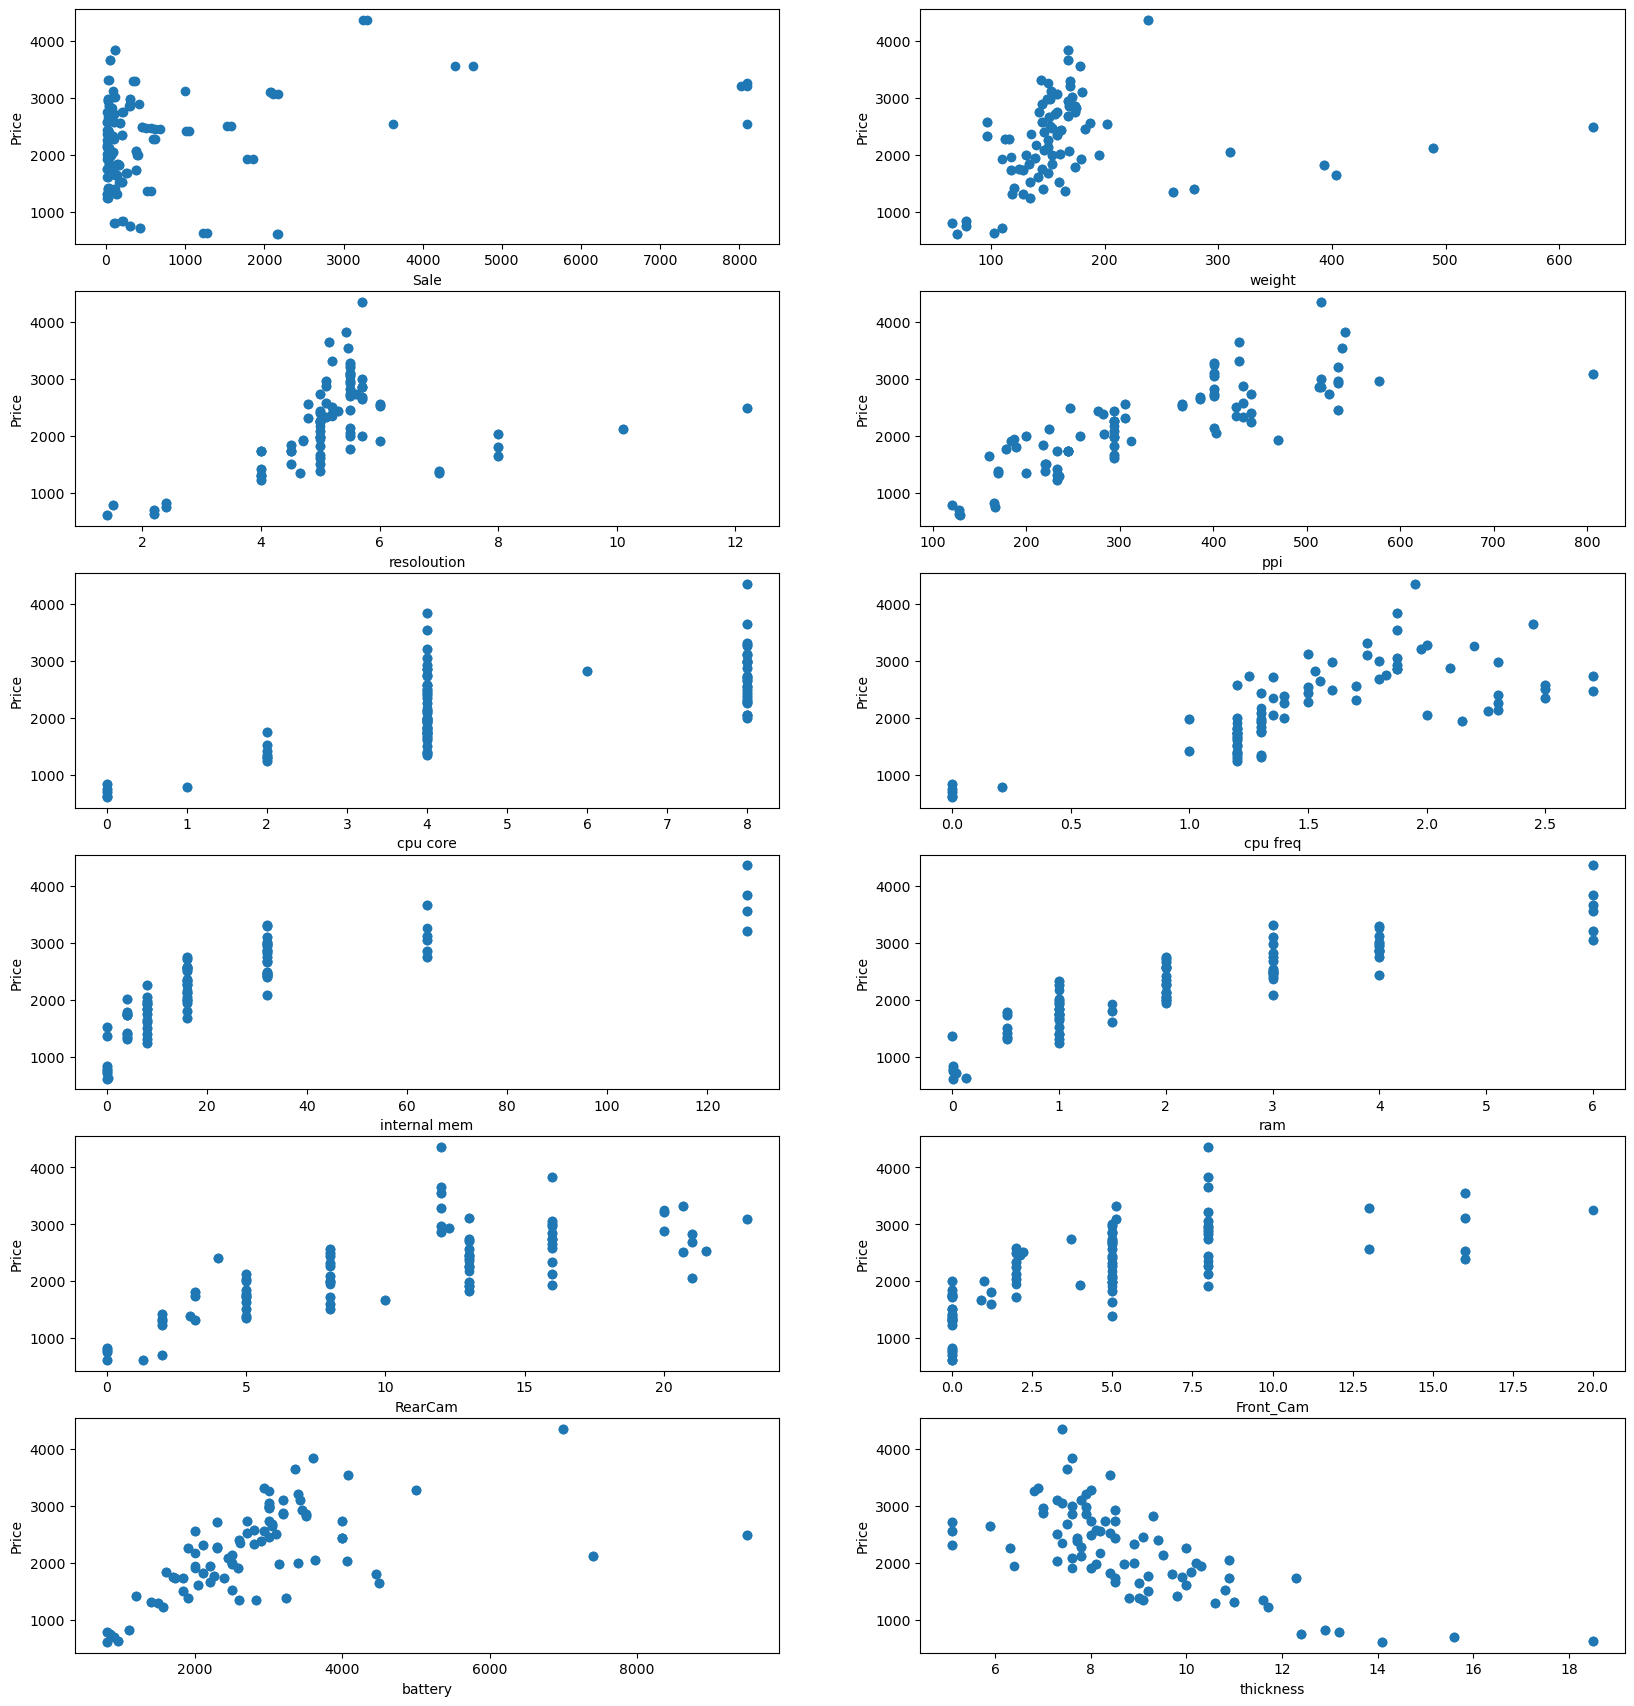

In [274]:
plt.figure(figsize = (20, 25))
for ind, var in enumerate(mobile.columns):
    
    if var != 'Price' and var != 'Product_id':
        plt.subplot(7, 2, ind+1)
        plt.scatter(mobile[var], mobile['Price'])
        plt.xlabel(var)
        plt.ylabel('Price')
        #plt.title(f'{var} Vs Price')
plt.show()

- We do not find any visible patter in the sale number and the price
- We also see that ppi(pixel per inch) is positively correlated with the price of the mobile, same goes for weight,cpu core, cpu freq, RearCam, Front_Cam, ram and internal memory
- With an increase in the battery life, there is a linear increase in the price of the mobile phones
- We see that as the thickness of the mobile phones increase there is a linear decreament in the price 

### Bivariate Analysis

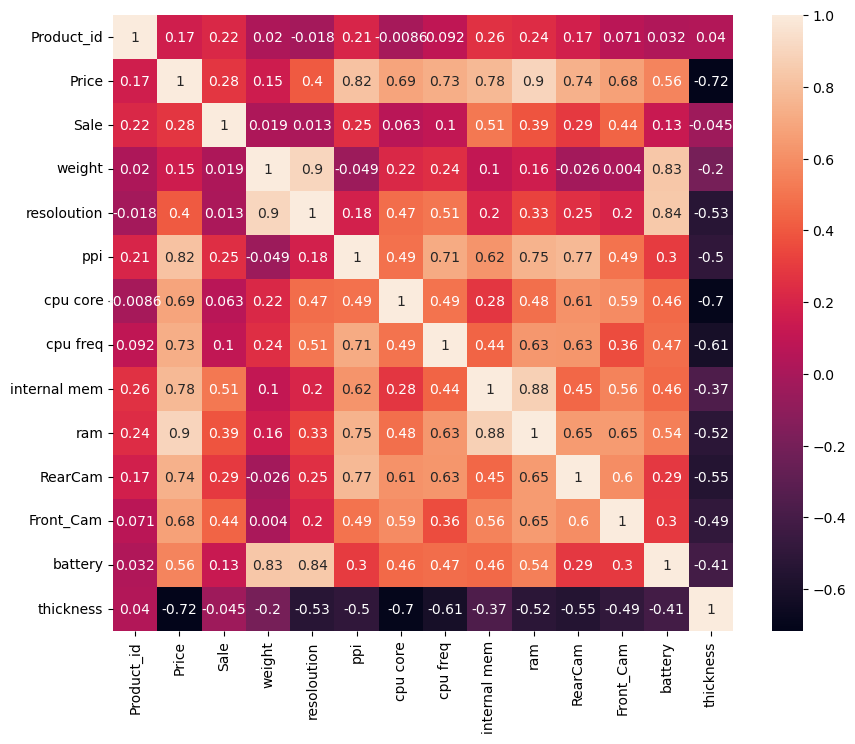

In [275]:
plt.figure(figsize = (10, 8))
sns.heatmap(mobile.corr(), annot = True)
plt.show()

## Data Splitting 

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [277]:
mobile2 = mobile.drop('Product_id', axis = 1)

In [278]:
X = mobile2.drop('Price', axis = 1)
y = mobile2['Price']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [280]:
X_train.shape, X_test.shape

((128, 12), (33, 12))

In [281]:
scaler = MinMaxScaler()
col = X_train.columns

X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

In [282]:
X_train.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
115,0.036964,0.191659,0.398148,0.572263,0.5,0.694444,0.2500,0.666667,0.695652,0.25,0.275862,0.186567
2,0.000000,0.078083,0.305556,0.278832,0.5,0.444444,0.0625,0.250000,0.565217,0.25,0.137931,0.186567
123,0.048090,0.228571,0.398148,0.200000,0.5,0.444444,0.1250,0.333333,0.347826,0.05,0.298851,0.380597
45,0.003709,0.115350,0.333333,0.252555,0.5,0.481481,0.1250,0.333333,0.565217,0.25,0.195402,0.268657
42,0.003461,0.119787,0.287037,0.141606,0.5,0.481481,0.0625,0.166667,0.217391,0.00,0.091954,0.373134


In [283]:
X_test.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
105,0.025096,0.022005,0.092593,0.065693,0.0,0.000000,0.00000,0.001333,0.000000,0.000,0.034483,0.582090
108,0.031895,0.149068,0.333333,0.252555,0.5,0.444444,0.12500,0.166667,0.434783,0.045,0.160920,0.253731
142,0.187910,0.152618,0.351852,0.442336,0.5,0.925926,0.12500,0.500000,0.900000,0.110,0.264368,0.164179
55,0.004327,0.191659,0.379630,0.083212,0.5,0.481481,0.03125,0.085333,0.217391,0.000,0.166667,0.305970
94,0.019038,0.120674,0.287037,0.145985,0.5,0.444444,0.06250,0.085333,0.217391,0.000,0.118391,0.305970


### Linear Regression

In [284]:
from sklearn.linear_model import LinearRegression

In [285]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [286]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [287]:
from sklearn.metrics import r2_score, mean_squared_error

In [288]:
r2_score(y_train, y_train_pred)

0.9516524756760252

In [289]:
r2_score(y_test, y_test_pred)

0.9611099861020811

In [290]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

148.48003996181657

## Statsmodels 

In [291]:
import statsmodels.api as sm

In [292]:
cols = X_train.columns

In [345]:
from sklearn.feature_selection import RFE

In [346]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select = 8)
rfe = rfe.fit(X_train, y_train)

In [347]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Sale', False, 4),
 ('weight', True, 1),
 ('resoloution', True, 1),
 ('ppi', True, 1),
 ('cpu core', True, 1),
 ('cpu freq', False, 2),
 ('internal mem', True, 1),
 ('ram', True, 1),
 ('RearCam', False, 5),
 ('Front_Cam', False, 3),
 ('battery', True, 1),
 ('thickness', True, 1)]

In [348]:
cols = X_train.columns[rfe.support_]
cols

Index(['weight', 'resoloution', 'ppi', 'cpu core', 'internal mem', 'ram',
       'battery', 'thickness'],
      dtype='object')

In [349]:
X_train.columns[~rfe.support_]

Index(['Sale', 'cpu freq', 'RearCam', 'Front_Cam'], dtype='object')

#### Model 1

In [350]:
X_train_sm = sm.add_constant(X_train[cols])
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()

lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     271.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.36e-72
Time:                        15:45:24   Log-Likelihood:                -842.99
No. Observations:                 128   AIC:                             1704.
Df Residuals:                     119   BIC:                             1730.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1398.0460    160.036      8.736      0.000    1081.160    1714.932
weight       -1029.2817    513.558     -2.004      0.047   -2046.178     -12.386
resoloution    136.5091    529.912      0.258      0.797    -912.770    1185.788
ppi            940.5209    134.152      7.011      0.000     674.887    1206.155
cpu core       397.4313     84.760      4.689      0.000     229.598     565.265
internal mem   569.0140    161.588      3.521      0.001     249.053     888.975
ram            774.7819    174.098      4.450      0.000     430.050    1119.513
battery       1218.4947    306.038      3.982      0.000     612.509    1824.480
thickness     -918.1098    197.274     -4.654      0.000   -1308.733    -527.487
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.474
Skew:                           0.085   Prob(JB):                        0.789
Kurtosis:                       2.756   Cond. No.                         65.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [351]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [352]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,99.09
2,resoloution,20.73
1,weight,20.34
6,ram,8.41
7,battery,8.16
5,internal mem,5.32
8,thickness,4.44
3,ppi,2.84
4,cpu core,2.65


#### Model 2

In [353]:
cols = cols.drop('resoloution')

X_train_sm = sm.add_constant(X_train[cols])
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()

lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           7.67e-74
Time:                        15:45:37   Log-Likelihood:                -843.03
No. Observations:                 128   AIC:                             1702.
Df Residuals:                     120   BIC:                             1725.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1432.3672     88.316     16.219      0.000    1257.508    1607.227
weight        -916.8410    269.547     -3.401      0.001   -1450.526    -383.156
ppi            947.0745    131.204      7.218      0.000     687.299    1206.850
cpu core       401.7522     82.760      4.854      0.000     237.893     565.611
internal mem   564.0979    159.832      3.529      0.001     247.642     880.554
ram            776.9611    173.215      4.486      0.000     434.008    1119.914
battery       1213.9866    304.346      3.989      0.000     611.403    1816.571
thickness     -954.0713    138.846     -6.871      0.000   -1228.977    -679.165
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.562
Skew:                           0.081   Prob(JB):                        0.755
Kurtosis:                       2.719   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [354]:
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,30.41
5,ram,8.39
6,battery,8.14
1,weight,5.65
4,internal mem,5.24
2,ppi,2.73
3,cpu core,2.54
7,thickness,2.22


In [355]:
X = X_train_sm.drop('const', axis = 1)
X.columns

Index(['weight', 'ppi', 'cpu core', 'internal mem', 'ram', 'battery',
       'thickness'],
      dtype='object')

## Residual Analysis

In [356]:
y_train_pred = lr_model2.predict(X_train_sm)

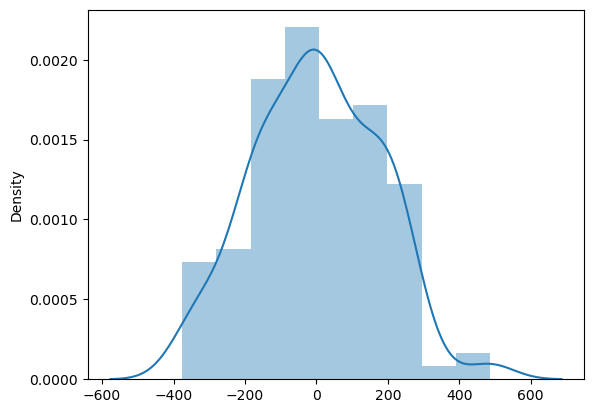

In [357]:
## validating the hypothesis that error terms are normally distributed with mean zero

res = y_train - y_train_pred

sns.distplot(res)
plt.show()

We see that the distribution of error terms is almost normal with mean as zero. 

Text(0, 0.5, 'residual')

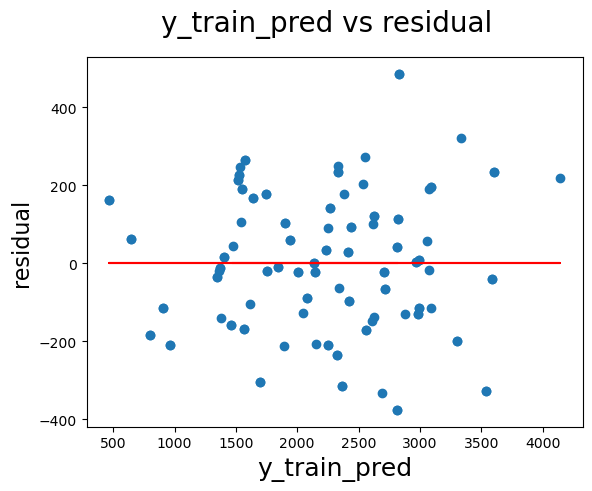

In [358]:
fig = plt.figure()
plt.scatter(y_train_pred,res)
plt.plot(y_train_pred, [0]*len(y_train_pred), c = 'r')
fig.suptitle('y_train_pred vs residual', fontsize=20)             
plt.xlabel('y_train_pred', fontsize=18)
plt.ylabel('residual', fontsize=16) 

We also find that the error terms has constant variance as we don't see any pattern in the above graph of predictions against residual.

# Predictions on the test data

In [359]:
X_test_new = X_test[X.columns]

X_test_sm = sm.add_constant(X_test_new)

In [360]:
y_test_pred = lr_model2.predict(X_test_sm)

# Model Evaluation

In [361]:
r2 = r2_score(y_test, y_test_pred)
r2

0.953266198614615

In [362]:
adj_r2 = 1 - (((1 - r2)*(len(X_test_new)))/ (len(X_test_new) - X_test_new.shape[1] -1))
adj_r2

0.9383113821712918

In [363]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

162.7663335881695

In [364]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

175.42347168014638

### Adaboost Regression 

In [365]:
from sklearn.ensemble import AdaBoostRegressor

In [366]:
adaboost = AdaBoostRegressor(n_estimators=50 , learning_rate=0.2, loss = 'linear')
adaboost.fit(X_train , y_train)

AdaBoostRegressor(learning_rate=0.2)

In [367]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.2)

In [368]:
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

In [369]:
train_r2 = r2_score(y_train, y_train_pred)
train_r2

0.9571634249596076

In [370]:
train_adj_r2 = 1 - (((1 - train_r2)*(len(X_train)))/ (len(X_train) - X_train.shape[1] -1))
train_adj_r2

0.9523210295202589

In [371]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.9389907873227152

In [372]:
test_adj_r2 = 1 - (((1 - test_r2)*(len(X_test)))/ (len(X_test) - X_test.shape[1] -1))
test_adj_r2

0.8993347990824802

In [373]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

185.9716468018104

### GBM Regression 

In [374]:
from sklearn.ensemble import GradientBoostingRegressor

In [383]:
gbm_regressor = GradientBoostingRegressor()
gbm_regressor.fit(X_train[cols], y_train)

GradientBoostingRegressor()

In [384]:
y_train_pred = gbm_regressor.predict(X_train[cols])
y_test_pred = gbm_regressor.predict(X_test[cols])

In [385]:
train_r2 = r2_score(y_train, y_train_pred)
train_r2

0.9977601966774486

In [386]:
train_adj_r2 = 1 - (((1 - train_r2)*(len(X_train)))/ (len(X_train) - X_train.shape[1] -1))
train_adj_r2

0.9975070015192472

In [387]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.9895789262673509

In [388]:
test_adj_r2 = 1 - (((1 - test_r2)*(len(X_test)))/ (len(X_test) - X_test.shape[1] -1))
test_adj_r2

0.9828052283411289

In [389]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

76.86086379307622